In [11]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')
import seaborn as sns
import plotly
import plotly.express as px

In [15]:
churn_data = pd.read_csv('data/churn.csv')
churn_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [16]:
churn_data = churn_data.drop(['RowNumber'], axis=1)
mask = churn_data['Balance'] > 2500
balance_distribution = churn_data[mask].sort_values(by='Balance',ascending=True)
balance_distribution

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8427,15806771,Yefremova,753,France,Female,40,0,3768.69,2,1,0,177065.24,1
5686,15713774,Chikwendu,644,Spain,Female,46,6,12459.19,1,0,0,156787.34,1
1791,15776467,De Salis,702,Spain,Female,35,8,14262.80,2,1,0,54689.16,0
5048,15741416,Yegorov,707,France,Male,42,2,16893.59,1,1,1,77502.56,0
6029,15669011,Bocharova,659,France,Female,44,9,23503.31,1,0,1,169862.01,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6717,15586674,Shaw,663,Spain,Female,58,5,216109.88,1,0,1,74176.71,1
3588,15571958,McIntosh,489,Spain,Male,40,3,221532.80,1,1,0,171867.08,0
8733,15714241,Haddon,749,Spain,Male,42,9,222267.63,1,0,0,101108.85,1
3280,15715622,To Rot,583,France,Female,57,3,238387.56,1,0,1,147964.99,1


In [ ]:
stay = churn_data['Exited']
stay.value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

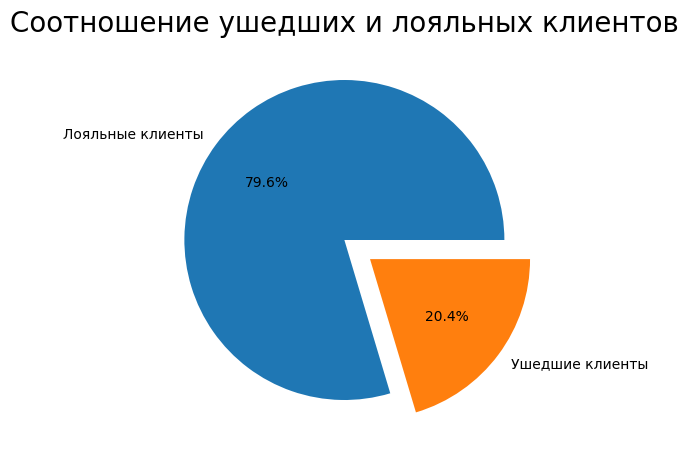

In [ ]:
# Задание 9.1
total_exited = churn_data['Exited'].value_counts()
fig = plt.figure(figsize=(4, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    total_exited,
    labels = ['Лояльные клиенты', 'Ушедшие клиенты', ],
    autopct='%.1f%%',
    explode = [0, 0.2]
    

);
axes.set_title('Cоотношение ушедших и лояльных клиентов', fontsize = 20);

In [ ]:
# По графику выше видно, что число лояльных клиентов больше чем ушедших в 4 раза.

count      6383.000000
mean     119827.493793
std       30095.056462
min        3768.690000
25%      100181.975000
50%      119839.690000
75%      139512.290000
max      250898.090000
Name: Balance, dtype: float64
250898.09


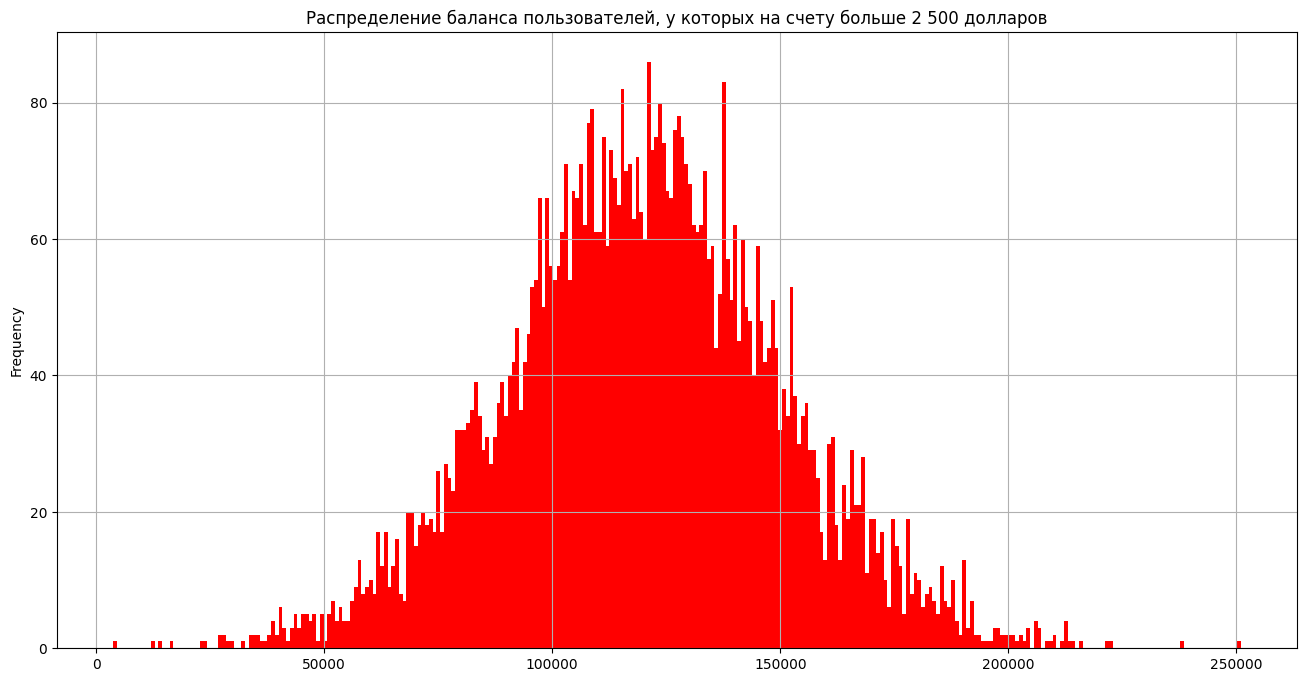

In [ ]:
# Задание 9.2
balance = churn_data['Balance'] > 2500 #  Фильтруем клиентов с балансов больше 2500 доллсров.
balance = churn_data[balance]['Balance']  # Сортируем по строке баланс.
print(balance.describe())
print(balance.max())
balance.plot(
    kind= 'hist',
    figsize= (16, 8),
    grid=True,
    bins = 300,
    color = 'red', 
    title= 'Распределение баланса пользователей, у которых на счету больше 2 500 долларов',
);


In [ ]:
# Распределение является нормальным.
# Подавялющее большинство клиентов  имеют на счету больше 50 тыс. дллларов, и меьнше 200 тыс. долларов.
#?? Среднее значение, все данные из метода !!!balance.describe




In [18]:
# Задание 9.3
fig = px.box(data_frame = churn_data ,
             x='Balance',
             color = 'Exited',
             title = ' график',
             )
fig.data[0].name='ушедшие'
fig.data[1].name='лояльные'
fig.show()